In [1]:
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pickle
import numpy as np
import os
import IPS
from scipy.stats import norm

In [2]:
def P_exact(ratio,T,r,sigma):
    # ratio = S_0/B
    p = 1 - 2*r/sigma**2

    dp = (np.log(ratio) + (r - 0.5*sigma**2 )*T)/(sigma*np.sqrt(T))
    dn = (-np.log(ratio) + (r - 0.5*sigma**2)*T)/(sigma*np.sqrt(T))

    return 1 - (norm(0,1).cdf(dp) - (ratio**p)*norm(0,1).cdf(dn))

In [3]:
with open('results/.single/np20000_nf1_T1.0_ns20_sp80.0_sv1_sigma0.25_DVTrue_alpha18.5_18.5_1/output.pkl','rb') as pfile:
    res = pickle.load(pfile)
with open('results/.single/np20000_nf1_T1.0_ns1_sp80.0_sv1_sigma0.25_DVTrue_MCTrue_alpha1_1_1/output.pkl','rb') as pfile:
    MCres = pickle.load(pfile)

In [4]:
X0=res['X0']
Xn=res['Xn'][0]
Wn=res['Wn'][0]
alpha = res['alpha'][0]
norm_consts = res['norm_consts'][0]
startPrice = res['args'].startprice
T = res['args'].maturity
r = 0.06
sigma = res['args'].sigma0

In [5]:
MCXn=MCres['Xn'][0]

In [9]:
barrierRatios = np.linspace(0.1,0.9,50)
pdef = []
pexact = []
pMC = []
for br in barrierRatios:
    barriers = br*startPrice
    default_prob,defcounts = IPS.estimator(X0,Xn,Wn,barriers,alpha,norm_consts)
    MCdefault_prob,MCdefcounts = IPS.MCestimator(MCXn,barriers)
    pdef.append(default_prob[1])
    pMC.append(MCdefault_prob[1])
    pexact.append(P_exact(1/br,T,r,sigma))

<IPython.core.display.Javascript object>


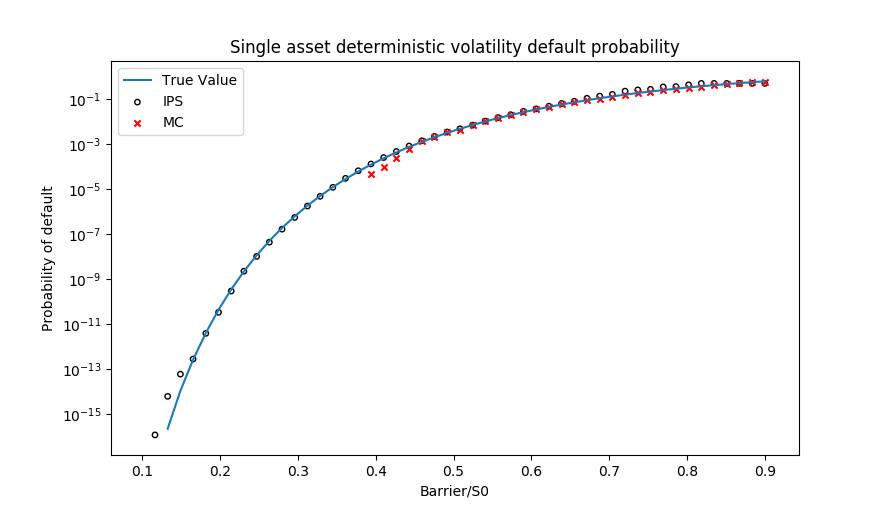

In [11]:
plt.semilogy(barrierRatios,pexact,label='True Value')
plt.scatter(barrierRatios,pdef,facecolors='none',edgecolors='black',s=15,label='IPS')
plt.scatter(barrierRatios,pMC,s=20,marker='x',c='r',label='MC')
plt.xlabel('Barrier/S0')
plt.ylabel('Probability of default')
plt.title('Single asset deterministic volatility default probability')
plt.legend()
plt.show()

In [8]:
pMC

[array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([ 1.,  0.]),
 array([  9.99950000e-01,   5.00000000e-05]),
 array([  9.99900000e-01,   1.00000000e-04]),
 array([  9.99750000e-01,   2.50000000e-04]),
 array([  9.99350000e-01,   6.50000000e-04]),
 array([ 0.99865,  0.00135]),
 array([ 0.99785,  0.00215]),
 array([ 0.9965,  0.0035]),
 array([ 0.99545,  0.00455]),
 array([ 0.99285,  0.00715]),
 array([ 0.98945,  0.01055]),
 array([ 0.9848,  0.0152]),
 array([ 0.9792,  0.0208]),
 array([ 0.97295,  0.02705]),
 array([ 0.96405,  0.03595]),
 array([ 0.95295,  0.04705]),
 array([ 0.9401,  0.0599]),
 array([ 0.9268,  0.0732]),
 array([ 0.9104,  0.0896]),
 array([ 0.89045,  0.10955]),
 array([ 0.8667,  